# Position of a Quasar

In [1]:
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

# Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

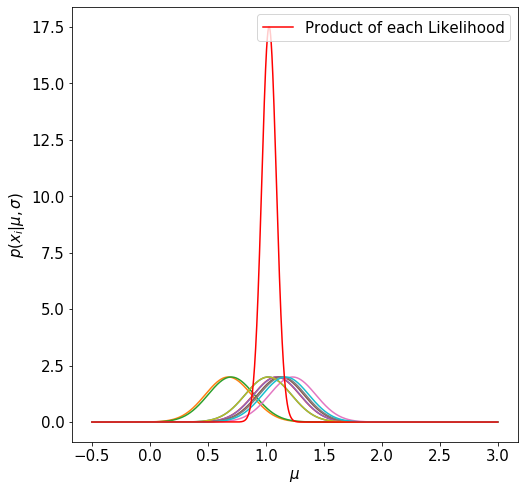

In [90]:
#I generate fake measurements

N = 10 
#gaussian parameters
mu = 1
sigma = 0.2

#gaussian for a given mu
x = rnd.normal(loc=mu, scale=sigma, size=N)
#plt.hist(x, density=True)

x_grid = np.linspace(-0.5, 3, 10000) #changes 
L = np.array([norm.pdf(x_grid, loc=y, scale=sigma) for y in x]) #gaussian for each point
p = np.prod(L, axis=0) #product of each likelihood

#gaussian for each point
for i in L:
    plt.plot(x_grid, i) #likelihood for each position
       
plt.plot(x_grid, p, color='red', label='Product of each Likelihood')
plt.xlabel('$\mu$') 
plt.ylabel(r'$p(x_i|\mu,\sigma)$') 
plt.legend(loc='upper right')
plt.show()

Now I read the maximum of the likelihood and I compare it with the MLE estimator.

In [91]:
sort = np.argsort(p)
max_index = sort[-1]
print("The maximum likelihood solution is:", x_grid[max_index]) #maximum likelihood solution

#compare it to the MLE
MLE = np.mean(x)
print("MLE estimator is:", MLE)

The maximum likelihood solution is: 1.0282528252825283
MLE estimator is: 1.0283792133074308


# Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

In [92]:
#second order differentiation of log-likelihood function
log_l_2 = np.diff(np.log(p), 2)

#divide for delta_theta**2 to have the correct normalization
error_mu = (log_l_2/(x_grid[1]-x_grid[0])**2)

#multiply by -1
error_mu *= -1

#now I take the square root
error_mu = 1/(np.sqrt(error_mu[0]))

print("Fisher matrix error is:", error_mu)

#compared to the estimated Fisher matrix error
MLE_err = sigma/N**0.5
print("The estimated Fisher matrix error is:", MLE_err)

Fisher matrix error is: 0.06324555319836184
The estimated Fisher matrix error is: 0.06324555320336758


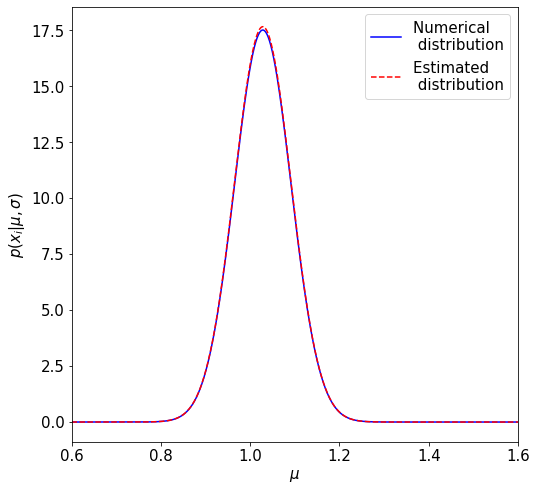

In [96]:
#plot the Gaussian at the measured mu
d_gauss = norm.pdf(x_grid, loc=MLE, scale=MLE_err)
plt.plot(x_grid, p, color='blue', label='Numerical \n distribution')

#I have to add a constant to normalize it, it changes every time since we are using random numbers
c = 2.8
plt.plot(x_grid, c*d_gauss, ls='dashed', color='red', label='Estimated \n distribution')
plt.xlim(0.6, 1.6)
plt.xlabel('$\mu$') 
plt.ylabel(r'$p(x_i|\mu,\sigma)$') 
plt.legend(loc='upper right')
plt.show()

I plot the Gaussian at the measured $\mu$ with its error as the scale to see if it matches the numerical likelihood distribution. The normalization changes every time since we are using random numbers.

# Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

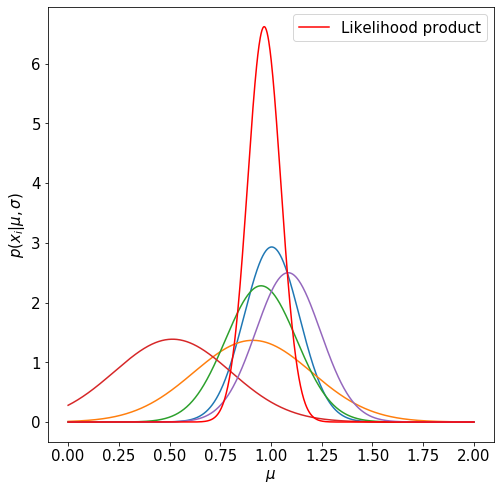

In [98]:
#generalization of the previous code

N = 5 #number of measurements

#gaussian parameters
sigma = norm(loc=0.2, scale=0.05).rvs(N) 
mu = 1

sample = np.array([norm(mu, i).rvs(1) for i in sigma])
s = np.concatenate(sample)
#print(s)

x_grid_1 = np.linspace(0, 2, 1000)
L = np.array([norm.pdf(x_grid_1, loc=x, scale=y) for x,y in zip(s, sigma)]) #gaussian for each point
p = np.prod(L, axis=0) #product of each likelihood

for i in L:
    plt.plot(x_grid_1, i) #likelihood for each position

only_sigma=0
for i in range(N):
    only_sigma += 1/(sigma[i]**2)
    #print(only_sigma)
    
plt.plot(x_grid_1, p, color='red', label='Likelihood product')
plt.xlabel('$\mu$') 
plt.ylabel(r'$p(x_i|\mu,\sigma)$') 
plt.legend(loc='upper right')
plt.show()

In [99]:
sort = np.argsort(p)
max_index = sort[-1]
print("The maximum likelihood solution is:", x_grid_1[max_index]) #maximum likelihood solution

#compare it to the MLE
MLE_1 = np.average(s, axis=None, weights=1/sigma**2)
print("MLE estimator is:", MLE_1)

The maximum likelihood solution is: 0.9669669669669669
MLE estimator is: 0.9663648401392482


In [100]:
#second order differentiation of log-likelihood function
log_l_2 = np.diff(np.log(p), 2)

#divide for delta_theta**2 to have the correct normalization
error_mu = log_l_2/((x_grid_1[1]-x_grid_1[0])**2)

#multiply by -1
error_mu *= -1

#now I take the square root
error_mu = 1/np.sqrt(error_mu[0])

print("Fisher matrix error is:", error_mu)

#compared to the estimated Fisher matrix error

MLE_err_1 = only_sigma**(-0.5)
print("The estimated Fisher matrix error is:", MLE_err_1)

Fisher matrix error is: 0.08171765286067091
The estimated Fisher matrix error is: 0.08171765286051093


Comparison of the two results

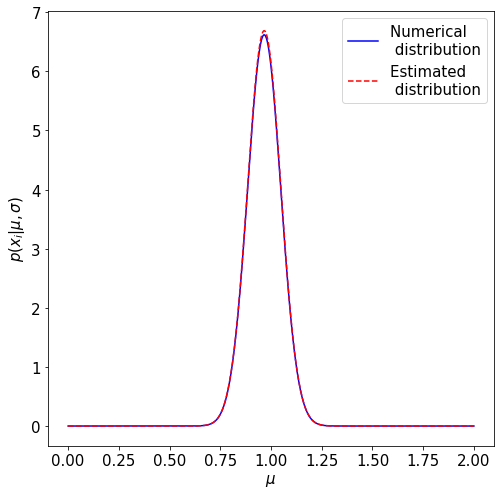

In [109]:
#plot the Gaussian at the measured mu
d_gauss_1 = norm.pdf(x_grid_1, loc=MLE_1, scale=MLE_err_1)

#I have to add a constant to normalize it, it changes every time since we are using random numbers
c = 1.37 #normalization constant
plt.plot(x_grid_1, p, color='blue', label='Numerical \n distribution')
plt.plot(x_grid_1, c*d_gauss_1, ls='dashed', color='red', label='Estimated \n distribution')
plt.xlabel('$\mu$') 
plt.ylabel(r'$p(x_i|\mu,\sigma)$') 
plt.legend(loc='upper right')
plt.show()